# Skin Cancer Classification

Link of dataset can be found <a href="https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000" >here</a>

Step to integrate dataset to the notebook : 
1. generate kaggle.json from your profile
2. download kaggle api command tools with `pip install kaggle`
3. move kaggle.json to ~/user/.kaggle
4. enter download command with `kaggle datasets download -d kmader/skin-cancer-mnist-ham10000`
5. move the zip file into `dataset` directory
6. extract the zip file 

In [41]:
import os
import splitfolders as split_folder
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [14]:
print(tf.__version__)

2.2.0


In [15]:
path_skin_cancer_csv = 'dataset/archive/HAM10000_metadata.csv'
df_skin_cancer = pd.read_csv(path_skin_cancer_csv)

In [16]:
df_skin_cancer.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [28]:
df_skin_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [17]:
skin_cancer_class = {
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1:('bcc' , 'basal cell carcinoma'),
    2:('bkl', 'benign keratosis-like lesions'),
    3:('df', 'dermatofibroma'),
    4:('nv', ' melanocytic nevi'),
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
    6:('mel', 'melanoma')
}
print(skin_cancer_class)

{0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'), 1: ('bcc', 'basal cell carcinoma'), 2: ('bkl', 'benign keratosis-like lesions'), 3: ('df', 'dermatofibroma'), 4: ('nv', ' melanocytic nevi'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 6: ('mel', 'melanoma')}


# Exploratory Data Analysis

Text(0.5, 1.0, 'Frequency Distribution of Classes')

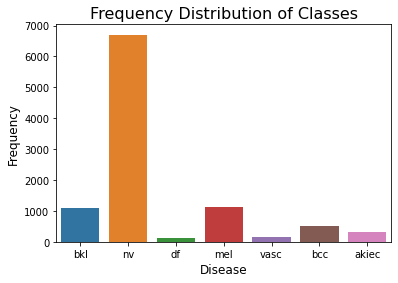

In [25]:
sns.countplot(x = 'dx', data = df_skin_cancer)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

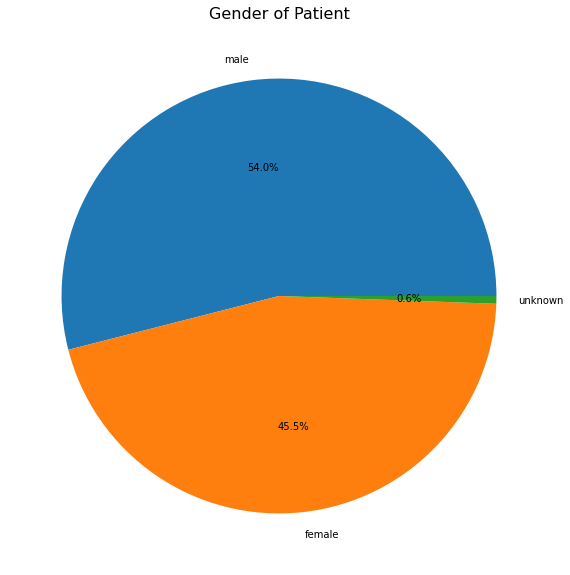

In [26]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(df_skin_cancer['sex'].value_counts(),
        labels = df_skin_cancer['sex'].value_counts().index,
        autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

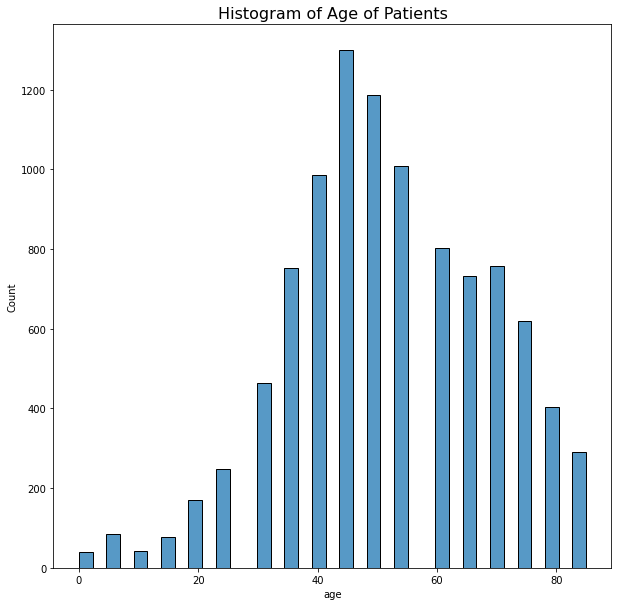

In [27]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(df_skin_cancer['age'])
plt.title('Histogram of Age of Patients', size=16)

# Split dataset
### Split dataset with 40% ratio for validation set

In [36]:
split_folder.ratio('dataset/archive', 'dataset/splited_data', seed=1, ratio=(.6, .4))



Copying files: 0 files [00:00, ? files/s]

Copying files: 25 files [00:00, 247.87 files/s]

Copying files: 86 files [00:00, 459.47 files/s]

Copying files: 156 files [00:00, 564.51 files/s]

Copying files: 213 files [00:00, 548.06 files/s]

Copying files: 268 files [00:00, 543.78 files/s]

Copying files: 323 files [00:00, 541.84 files/s]

Copying files: 378 files [00:00, 521.84 files/s]

Copying files: 431 files [00:00, 517.95 files/s]

Copying files: 494 files [00:00, 550.16 files/s]

Copying files: 551 files [00:01, 554.32 files/s]

Copying files: 623 files [00:01, 602.68 files/s]

Copying files: 684 files [00:01, 602.37 files/s]

Copying files: 746 files [00:01, 606.35 files/s]

Copying files: 810 files [00:01, 616.35 files/s]

Copying files: 872 files [00:01, 613.77 files/s]

Copying files: 934 files [00:01, 608.14 files/s]

Copying files: 995 files [00:01, 580.70 files/s]

Copying files: 1058 files [00:01, 594.44 files/s]

Copying files: 1118 files [00:01, 585.13 files/s]

Copyi

Copying files: 8455 files [00:18, 458.44 files/s]

Copying files: 8514 files [00:18, 489.67 files/s]

Copying files: 8571 files [00:18, 509.47 files/s]

Copying files: 8625 files [00:18, 403.61 files/s]

Copying files: 8677 files [00:18, 429.63 files/s]

Copying files: 8741 files [00:18, 480.63 files/s]

Copying files: 8794 files [00:18, 397.08 files/s]

Copying files: 8847 files [00:18, 426.78 files/s]

Copying files: 8896 files [00:19, 442.04 files/s]

Copying files: 8948 files [00:19, 460.13 files/s]

Copying files: 8997 files [00:19, 437.46 files/s]

Copying files: 9060 files [00:19, 487.73 files/s]

Copying files: 9115 files [00:19, 502.94 files/s]

Copying files: 9167 files [00:19, 407.76 files/s]

Copying files: 9216 files [00:19, 426.86 files/s]

Copying files: 9273 files [00:19, 463.42 files/s]

Copying files: 9323 files [00:19, 470.92 files/s]

Copying files: 9373 files [00:20, 384.51 files/s]

Copying files: 9430 files [00:20, 427.76 files/s]

Copying files: 9477 files [00:2

In [42]:
splited_dataset_dir = 'dataset/splited_data'
train_dir = os.path.join(splited_dataset_dir,'train')
val_dir = os.path.join(splited_dataset_dir,'val')

In [43]:
os.listdir(train_dir)

['HAM10000_images_part_2', 'HAM10000_images_part_1', 'ham10000_images_part_1']

In [44]:
os.listdir(val_dir)

['HAM10000_images_part_2', 'HAM10000_images_part_1', 'ham10000_images_part_1']